In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow import keras

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

In [ ]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=[0.2,0.5],
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\BARANIDHARAN SIR PROJECT\X-Ray Images Dataset for research project-20211204T084221Z-001',
    target_size=(331, 331),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\BARANIDHARAN SIR PROJECT\X-Ray Images Dataset for research project-20211204T084221Z-001', # same directory as training data
    target_size=(331, 331),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(331, 331, 3))

Found 5171 images belonging to 3 classes.
Found 1292 images belonging to 3 classes.


In [ ]:
from keras.applications import nasnet

NASNET_MOBILE = Sequential()

nasnetmobile_model =keras.applications.nasnet.NASNetMobile(
    input_tensor=Input(shape=(331,331,3)), include_top=False, weights='imagenet',
    pooling=('max'), classes=3
)

In [ ]:
for layer in nasnetmobile_model.layers:
    layer.trainable = False
    
NASNET_MOBILE.add(nasnetmobile_model)
NASNET_MOBILE.add(Flatten())
NASNET_MOBILE.add(Dense(512,activation='relu'))
NASNET_MOBILE.add(Dense(3, activation='softmax'))

NASNET_MOBILE.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001)
NASNET_MOBILE.compile(optimizer=Adam, loss='categorical_crossentropy', metrics=['accuracy'])

graph = NASNET_MOBILE.fit(train_generator, epochs=25, validation_data = validation_generator)

graph

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 1056)              4269716   
_________________________________________________________________
flatten (Flatten)            (None, 1056)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               541184    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 4,812,439
Trainable params: 542,723
Non-trainable params: 4,269,716
_________________________________________________________________
Epoch 1/25
162/162 [==============================] - 783s 5s/step - loss: 1.1579 - accuracy: 0.6328 - val_loss: 0.6107 - val_accuracy: 0.7376
Epoch 2/25
162/162 [==============================] - 889s 5s/step - loss: 0.6837 - accuracy:

<Figure size 432x288 with 0 Axes>

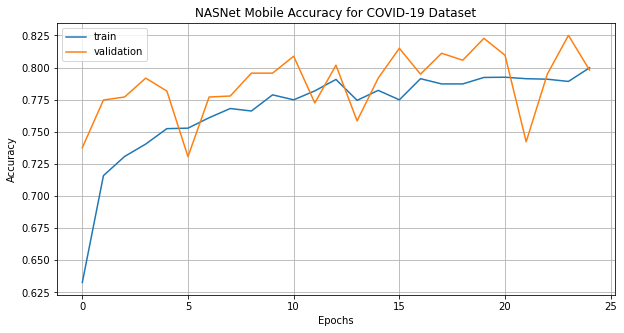

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.figure(figsize=(10,5))

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('NASNet Mobile Accuracy for COVID-19 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

In [ ]:
max_acc = max(graph.history['val_accuracy'])

print('The highest accuracy achieved using NASNet Mobile model is',max_acc*100)

The highest accuracy achieved using NASNet Mobile model is 82.50774145126343
